In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/airline_passenger_satisfaction.csv')
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
print(data.isnull().sum())

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [7]:
data['Arrival Delay'] = data['Arrival Delay'].fillna(data['Arrival Delay'].mean())

In [9]:
print(data.isnull().sum())

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

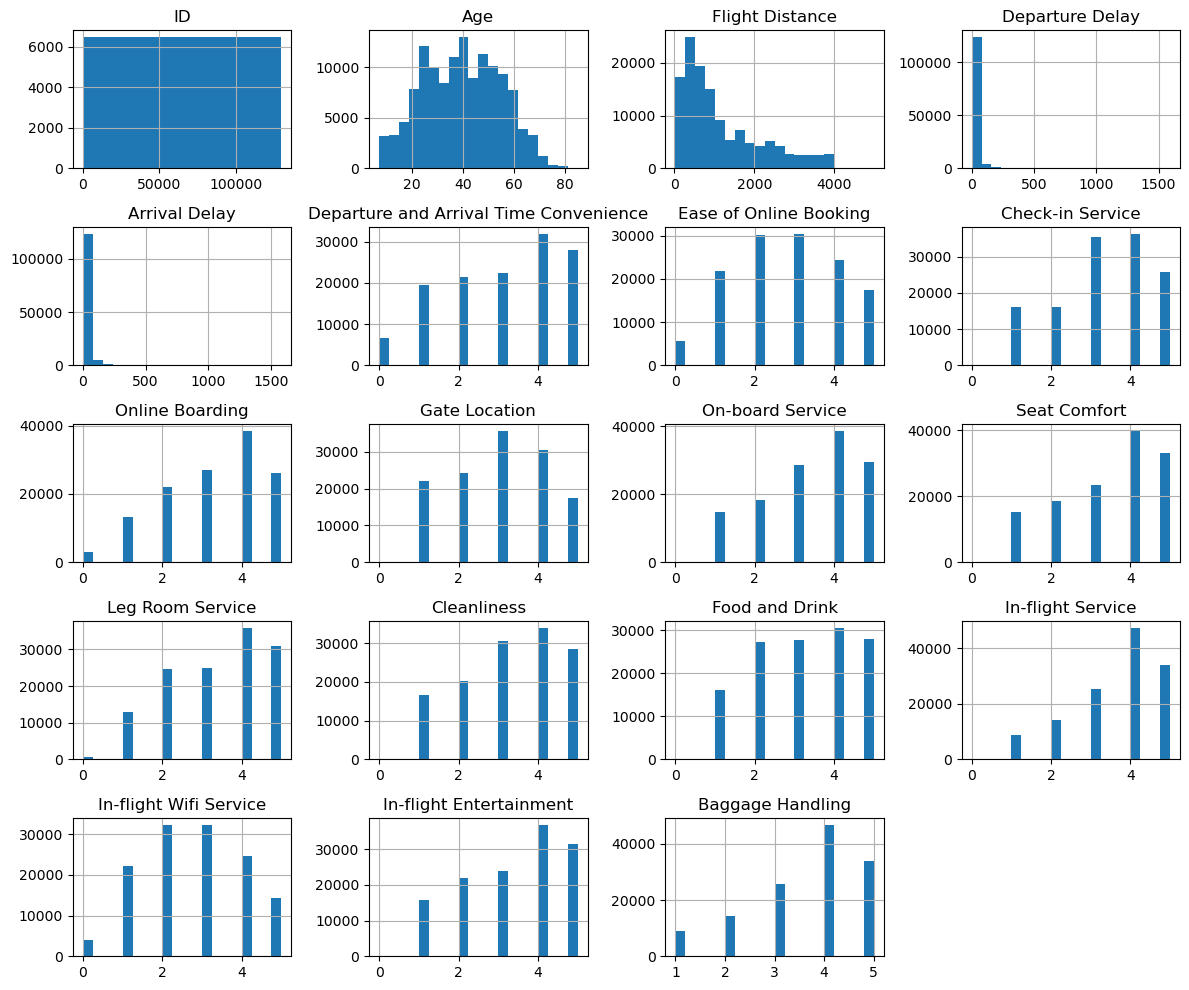

In [11]:
data.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [13]:
# fit transform is used to ensure that 1 is assigned to Satisfied in Satifaction column
le = LabelEncoder()
data['Satisfaction'] = le.fit_transform(data['Satisfaction']) 

In [15]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
data[categorical_cols] = data[categorical_cols].apply(le.fit_transform)

In [17]:
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


In [19]:
# Drop the ID column
data = data.drop(data.columns[[0]], axis=1)

In [21]:
data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


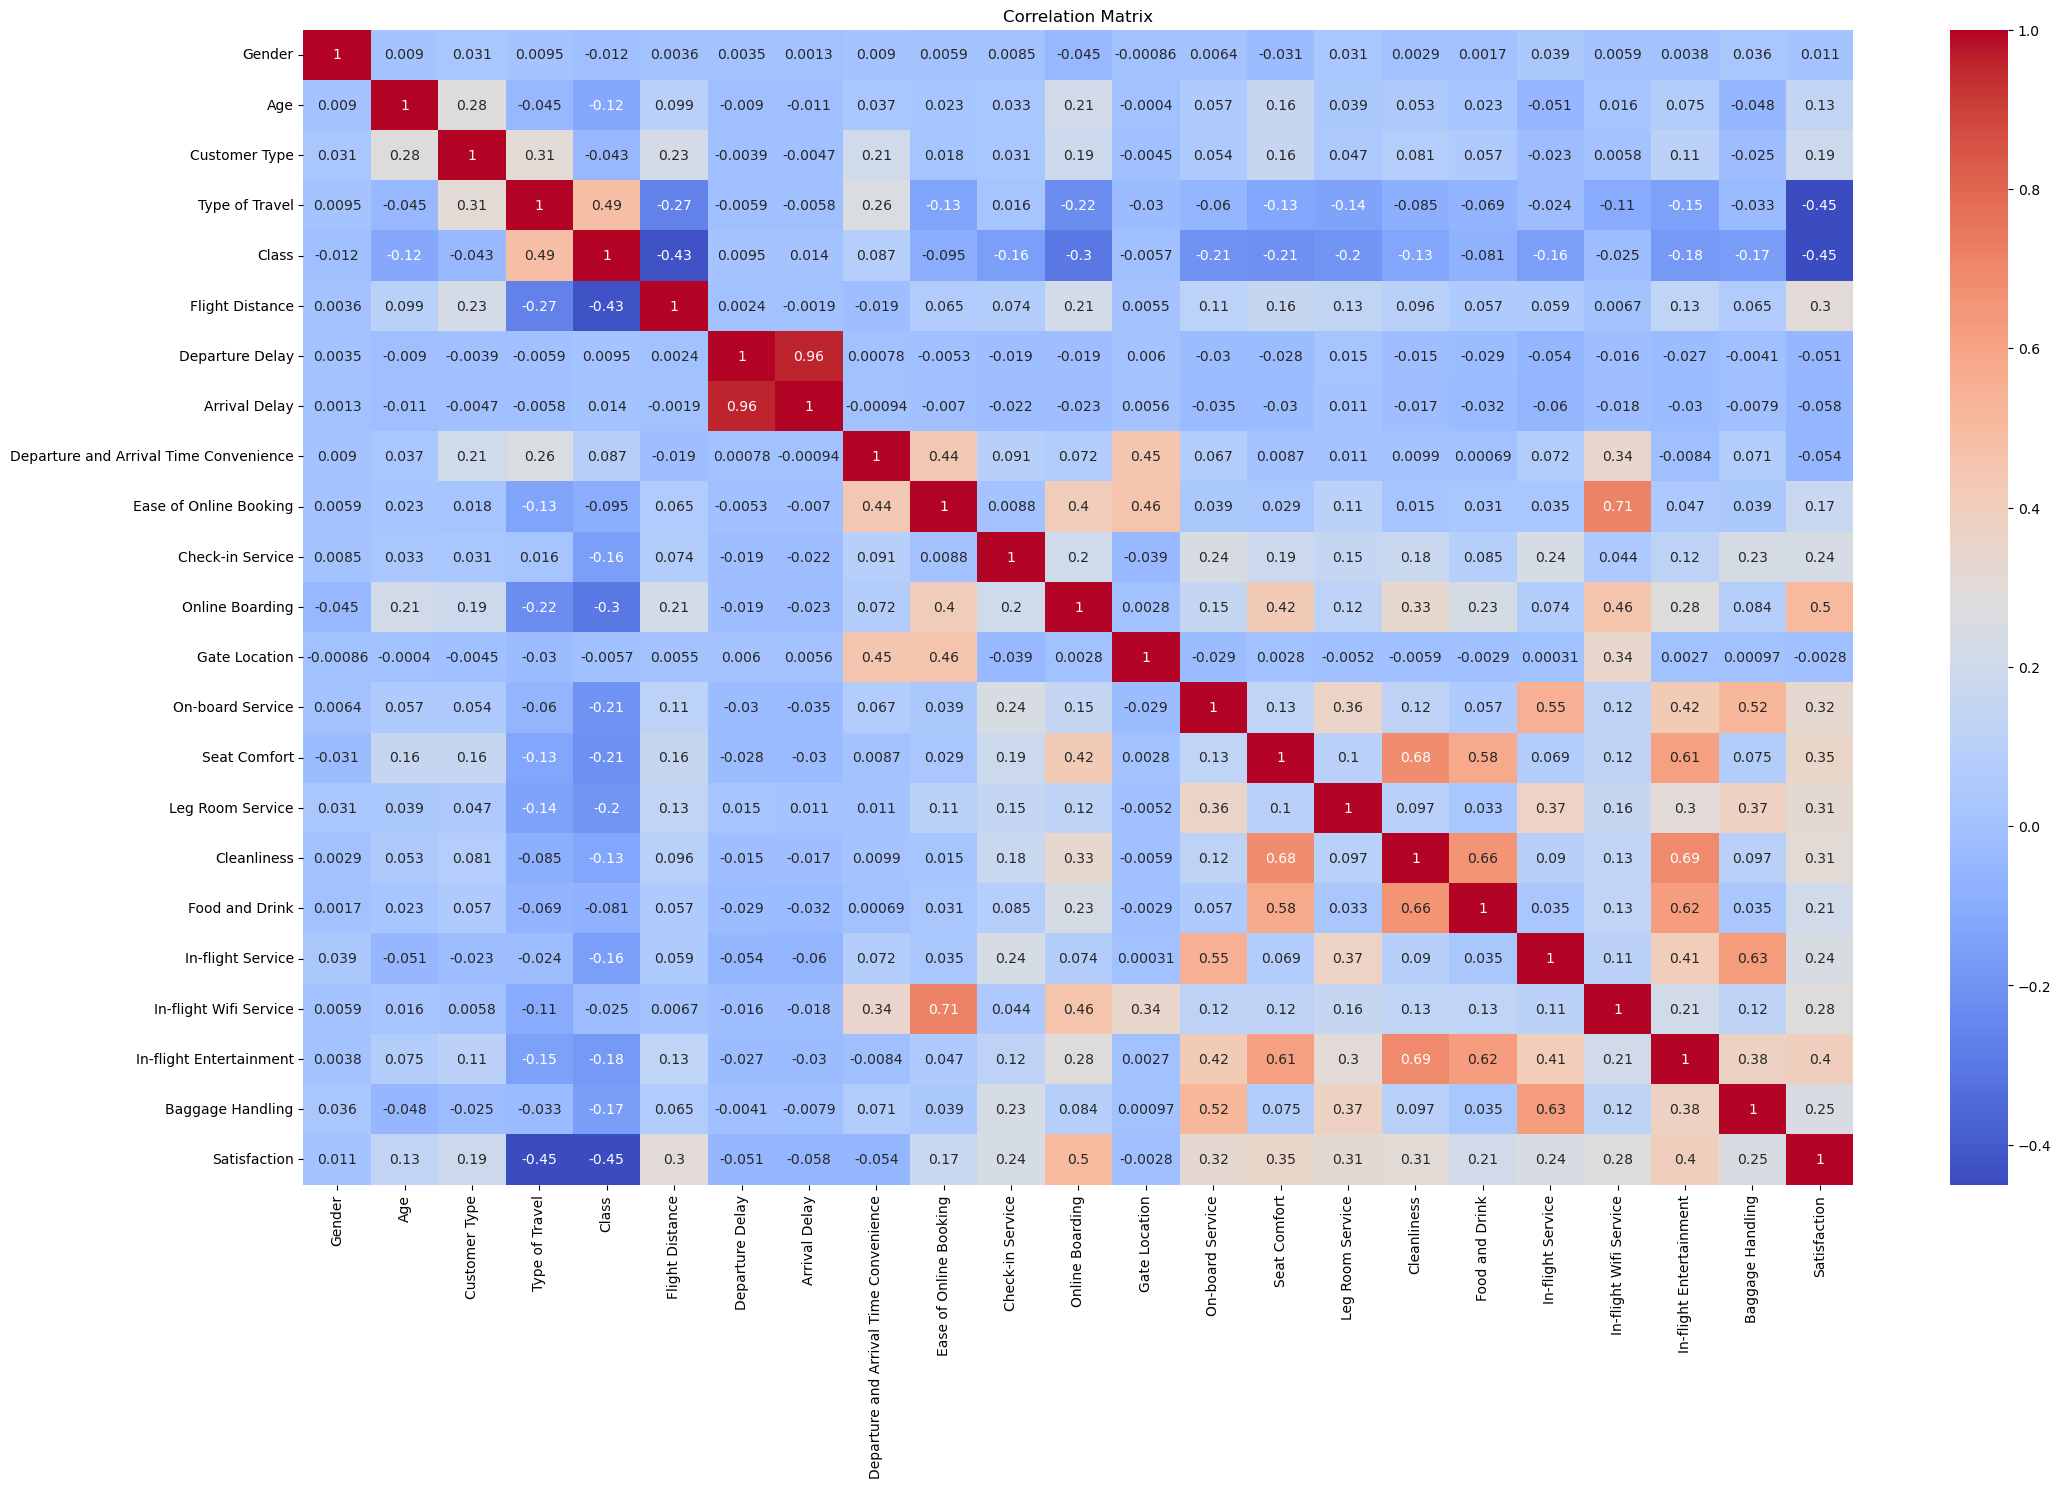

Satisfaction                              1.000000
Online Boarding                           0.501749
In-flight Entertainment                   0.398234
Seat Comfort                              0.348829
On-board Service                          0.322205
Leg Room Service                          0.312424
Cleanliness                               0.307035
Flight Distance                           0.298085
In-flight Wifi Service                    0.283460
Baggage Handling                          0.248680
In-flight Service                         0.244918
Check-in Service                          0.237252
Food and Drink                            0.211340
Customer Type                             0.186017
Ease of Online Booking                    0.168877
Age                                       0.134091
Gender                                    0.011236
Gate Location                            -0.002793
Departure Delay                          -0.050740
Departure and Arrival Time Conv

In [23]:
#Fetch the numberic values - all columns will be fetched as we have converted them to numeric value
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(corr_matrix['Satisfaction'].sort_values(ascending=False))
    

In [ ]:

attributes = ["Online Boarding", "In-flight Entertainment", "Seat Comfort","Satisfaction"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()